In [34]:
import boto3
import os
import json
import boto3
from pathlib import Path
import sagemaker
from sagemaker.pytorch import PyTorch
import sys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('../dataset/fake-customer-2.csv')


In [3]:
X = data.drop('churned', axis=1)
y = data['churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
#get feature names
feature_names = data.columns.tolist()
feature_names.pop(-1)
print(feature_names)

['ID', 'Num of Calls', 'Wait times', 'website visits']


In [17]:

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [5]:
#make prediction
y_pred = rf.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3333333333333333


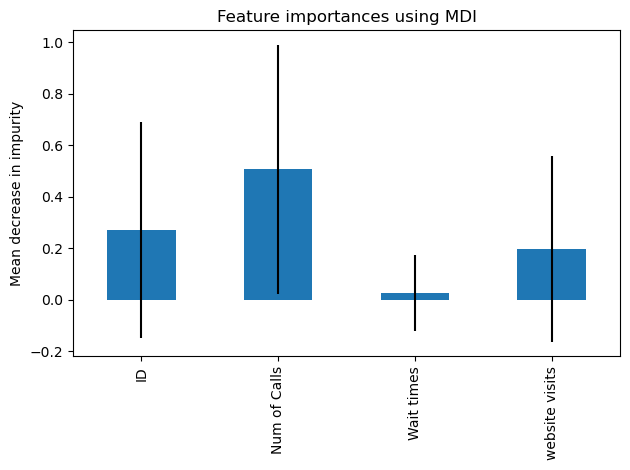

In [33]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()